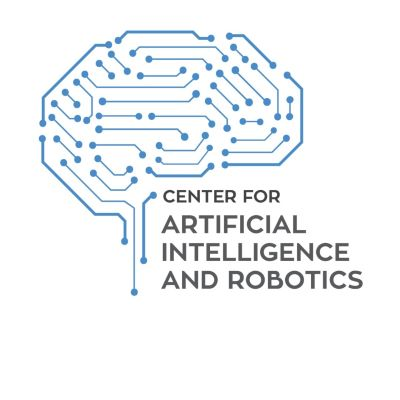

# Practice 4

Alright, now that we've learned both regular neural networks and convolutional neural networks, we want to go ahead and train a few networks to see what kind of results we get.

# CIFAR Dataset

# 📦 What's the Difference Between CIFAR-10 and CIFAR-100?

Both **CIFAR-10** and **CIFAR-100** are image classification datasets made up of 32×32 color images, but they differ in terms of class granularity and complexity.

---

## 🔍 Key Differences

| Feature | **CIFAR-10** | **CIFAR-100** |
|--------|--------------|----------------|
| 📚 Number of Classes | 10 | 100 |
| 🖼️ Images per Class | 6,000 | 600 |
| 🧠 Total Training Images | 50,000 | 50,000 |
| 🧪 Test Images | 10,000 | 10,000 |
| 📏 Image Size | 32×32 pixels (RGB) | 32×32 pixels (RGB) |
| 🧱 Label Structure | Flat (single level) | Hierarchical (fine + coarse labels) |
| 🔠 Example Classes | airplane, dog, frog, truck... | tulip, maple_tree, baby, pickup_truck... |

---

## 💡 Which One to Use?

- ✅ **Use CIFAR-10** if you're:
  - Just getting started with image classification
  - Testing simple or baseline models

- ✅ **Use CIFAR-100** if you're:
  - Exploring more challenging, fine-grained tasks
  - Interested in hierarchical or multi-task classification

---

CIFAR-10 is great for beginners and prototyping.  
CIFAR-100 offers a more realistic challenge for testing model robustness.


# Importing Dataset, Packages, and and Overview on the Dataset  

Using the commands and datasets available in Keras, we first load the CIFAR-10 dataset.

We then also import the necessary libraries as well.

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import cv2

In [2]:
import matplotlib.pyplot as plt

## Loading Train and Test sets with their Labels

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

We print the overall shape of our dataset to see how many training and test images we have, and also to check what the shape of our labels looks like.

In [4]:
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [6]:
x_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
y_train[0]

array([6], dtype=uint8)

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Using Matplotlib, we display a few images from our dataset to get a general idea of what the dataset contains.

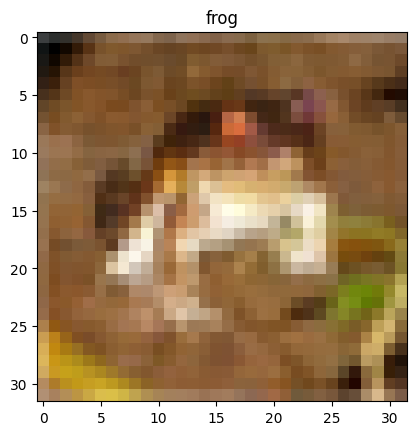

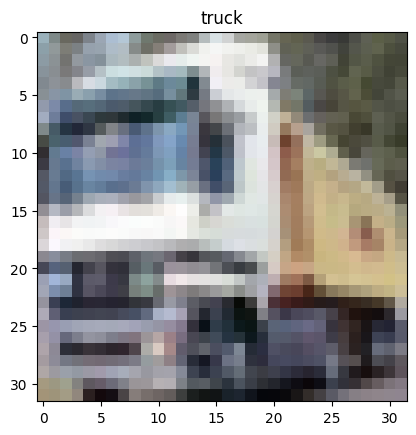

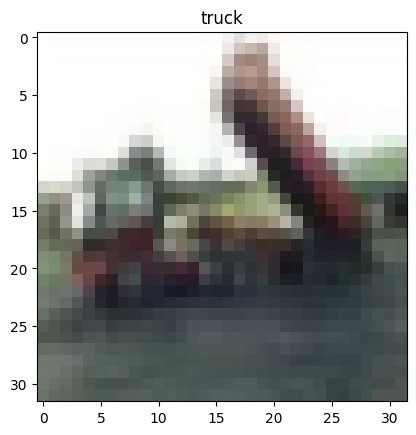

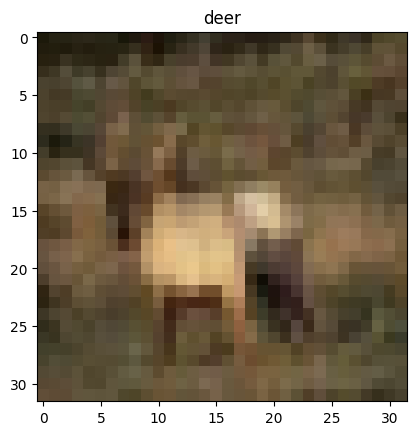

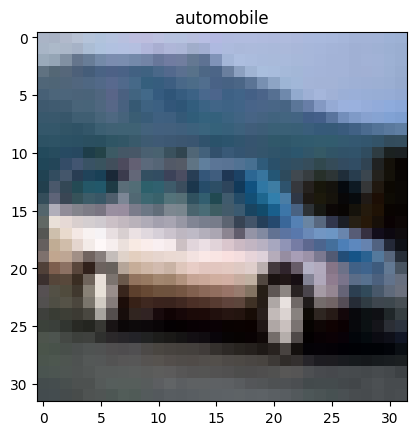

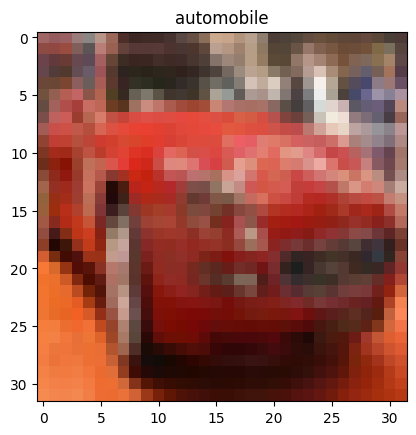

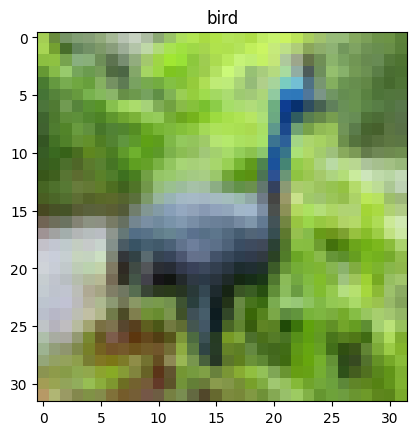

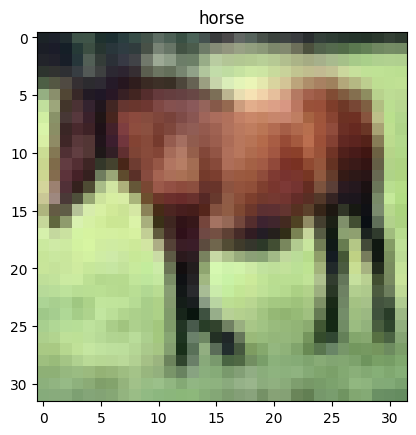

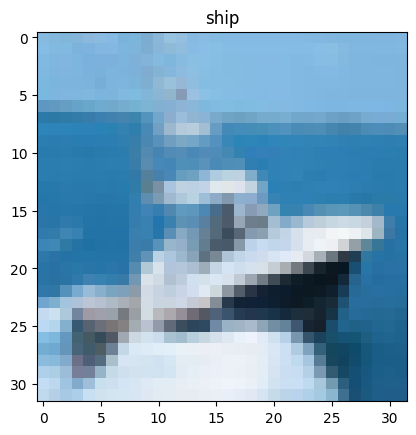

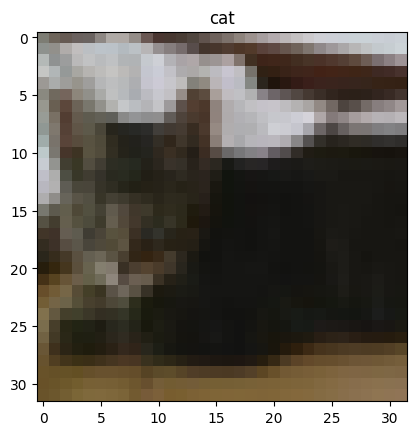

In [11]:
for i in range(10):
    plt.imshow(x_train[i])       # Show the third image
    plt.title(class_names[int(y_train[i])])
    plt.show()

# ANN

At this stage, we want to fit an ANN on the CIFAR dataset images. But before that, we need to do a few things on the data first!

At this stage, we want to fit an ANN on the CIFAR dataset images. But before that, we need to do a few things on the data! And after that, they need to be in a format that can be fed into the ANN as input.

### ⚠️ Important Reminder: Don't Forget the 3 Color Channels!

When working with CIFAR-10 images:

- Each image has the shape **(32, 32, 3)** → height, width, and 3 **color channels** (RGB)
- If you're flattening the images to feed them into a fully connected ANN, make sure to include **all 3 channels**

In [7]:
x_train.shape[0]

50000

In [11]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)

In [12]:
x_train_flat.dtype  # dtype('uint8')

dtype('uint8')

In [13]:
x_train_final = x_train.reshape(x_train.shape[0], -1) / 255
x_test_final = x_test.reshape(x_test.shape[0], -1) / 255

In [15]:
x_train_final.dtype

dtype('float64')

### 🛠️ Image Preprocessing Explained: Reshaping, Normalization, and Data Type

Before feeding image data into a fully connected Artificial Neural Network (ANN), we need to prepare it properly. Here's why we apply the following steps:

---

#### 🔄 1. **Why do we reshape the images?**

Original image shape from CIFAR-10: (32, 32, 3) → height, width, RGB channels


- Neural networks using dense (fully connected) layers expect **1D input vectors**, not 3D images.
- So we reshape each image to a **flat vector**: 32 × 32 × 3 = 3072

✅ Final reshaped training set shape: (50000, 3072)

---

#### 🎨 2. **Why do we divide by 255? (Normalization)**

Pixel values in image data range from **0 to 255** (uint8).

- Dividing by 255 scales them to the range **[0.0, 1.0]**
- This makes training **faster, more stable, and more accurate**
- Neural networks generally perform better when inputs are **small, centered, and normalized**

---

#### 🔢 3. **Why use `.astype("float32")`?**

By default, dividing an integer array by an integer (like `/ 255`) in NumPy **converts the result to float64**. While this works, it's not ideal for deep learning:

| Reason | Why it matters |
|--------|----------------|
| ✅ ML Frameworks Expect It | Libraries like TensorFlow and PyTorch use `float32` by default |
| ⚡ More Efficient on GPU | `float32` uses less memory and computes faster than `float64` |
| 📏 Lower Memory Usage | Saves half the memory compared to `float64` |
| 🧠 Consistency | Ensures compatibility and avoids subtle bugs later |

---

### ✅ Final Code

```python
x_train_final = x_train.reshape((x_train.shape[0], -1)).astype("float32") / 255.0
x_test_final = x_test.reshape((x_test.shape[0], -1)).astype("float32") / 255.0

##### To make sure our data is in the format we want, we print their shapes.

In [16]:
print("Training images shape:", x_train_final.shape)
print("Training labels shape:", x_test_final.shape)

Training images shape: (50000, 3072)
Training labels shape: (10000, 3072)


Now, the label format needs to match the format of our network's output — meaning it should have 10 values.
So, using the to_categorical function from Keras, we create the desired labels.

In [19]:
y_train.max()

9

In [ ]:
from keras.utils import to_categorical
y_train_cat = #Your Code Here
y_test_cat = #Your Code Here

<div dir="auto">
حالا باید مدلتون رو بسازید
اول از همه اون کلاس ها و توابع و لایه هایی که نیاز دارید رو ایمپورت کنید

In [ ]:
from keras.model import #Your Code Here???
from keras.layers import #Your Code Here???

<div dir="auto">
حالا مدلتون رو بسازید

    1. مدلتون رو به صورت Sequential بسازید
    2. لایه ی اولیه رو لایه ی Input قرار بدید و شکل ورودی رو براش مشخص کنید
    3. بعد لایه های Dense به به ترتیب با تعداد نود های 512و512و1024و10 قرار بدید و اکتیویشن های مناسب رو برای هر کدوم قرار بدید

In [ ]:
model = #Your Code Here
model.add(#Your Code Here)
model.add(#Your Code Here)
model.add(#Your Code Here)
model.add(#Your Code Here)
model.add(#Your Code Here)

<div dir="auto">
مدلتون رو کامپایل کنید
تابع هزینه تون رو categorical_crossentrpy قرار بدید و از اپتیمایزر adam استفاده کنید
    
    همچنین از متریک accuracy استفاده کنید که نتایج شبکه تون براتون ملموس تر باشه

In [ ]:
model.compile(#Your Code Here)

<div dir="auto">
خلاصه ی مدلتون رو نگاه کنید
چه تعداد پارامتر دارید؟

In [ ]:
model.summary()

<div dir="auto">
مدلتون رو روی دیتاهایی که آماده کردید فیت کنید، از آرگمان های زیر استفاده کنید.
batch_size = 128
epochs = 30
داده های ولیدیشن هم یادتون نره! شما میخواید نتیجه ی مدلتون روی دیتاست test خوب باشه پس اونم باید توی آموزش در نظر بگیرید

In [ ]:
model.fit(#Your Code Here)

<div dir="auto">
نتایج چطور بود؟

# CNN

<div dir="auto">
   حالا بیاید یه شبکه ی CNN بزنیم!

<div dir="auto">
مثل قبل اولین کاری که باید بکنید اینه که داده هاتون رو به صورت مناسب تبدیل کنید
پس داده هاتون باید بین 0 تا 1 باشند

In [ ]:
x_train_final = #Your Code Here
x_test_final = #Your Code Here

<div dir="auto">
حالا باید فرمت لیبل ها به اون صورتی باشه که خروجی شبکه مون هست! یعنی 10 تایی
پس با استفاده از تابع
to_categorical
از کراس لیبل های مطلوب رو بسازید

In [ ]:
from keras.utils import to_categorical
y_train_cat = #Your Code Here
y_test_cat = #Your Code Here

<div dir="auto">
حالا باید مدلتون رو بسازید
اول از همه اون کلاس ها و توابع و لایه هایی که نیاز دارید رو ایمپورت کنید

In [ ]:
from keras.model import #Your Code Here???
from keras.layers import #Your Code Here???

<div dir="auto">
حالا مدلتون رو بسازید
    
    1. مدل رو به صورت Sequential تعریف کنید

    2. لایه ی ورودی رو به شبکه تون اضافه کنید و شیپی که قبول می کنه براش مشخص کنید

    3. سه تا لایه ی کانولوشنی به ترتیب با تعداد فیلتر های 32 و 32 و 32 بسازید

    4. یک لایه ی مکس پولینگ برای شبکه تون قرار بدید
    
    5. یک لایه ی فلتن به مدلتون اضافه کنید
    
6. 3 لایه ی دنس با تعداد نود های به ترتیب 64، 32، 10 بسازید و اکتیوشن های مناسب رو قرار بدید

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = Sequential()
model.add(#Your Code here)
model.add(#Your Code here)
model.add(#Your Code here)
model.add(#Your Code here)
model.add(#Your Code here)
model.add(#Your Code here)
model.add(#Your Code here)
model.add(#Your Code here)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

<div dir="auto">
مدلتون رو کامپایل کنید
تابع هزینه تون رو categorical_crossentrpy قرار بدید و از اپتیمایزر adam استفاده کنید
    
    همچنین از متریک accuracy استفاده کنید که نتایج شبکه تون براتون ملموس تر باشه

In [ ]:
model.compile(#Your Code Here)

<div dir="auto">
خلاصه ی مدلتون رو نگاه کنید
چه تعداد پارامتر دارید؟

In [ ]:
model.summary()

<div dir="auto">
مدلتون رو روی دیتاهایی که آماده کردید فیت کنید، از آرگمان های زیر استفاده کنید.
batch_size = 128
epochs = 30
داده های ولیدیشن هم یادتون نره! شما میخواید نتیجه ی مدلتون روی دیتاست test خوب باشه پس اونم باید توی آموزش در نظر بگیرید

In [ ]:
model.fit(#Your Code Here)

# Comparison

<div dir="auto">
    خب خسته نباشید!
    حالا نتایج رو با هم مقایسه کنید.

<div dir="auto">
تعداد پارامترهای مدل ANN چند برابر مدل CNN بود؟

...

<div dir="auto">
این تفاوت در دقت ناشی از چیه؟

...

# امتیازی

<div dir="auto">
    هم مدلANN و هم مدل CNN تون رو تغییر بدین!
    
    ببینید بالاترین دقتی که ازش میگیرید چقدر هستش
    
    این قسمت به صورت امتیازی هستش و اجباری نیست ولی به یادگیری خودتون خیلی کمک می کنه که بیاید نتایج رو با هم مقایسه کنید و روی مدل های مختلف آموزش انجام بدید

<div dir="auto">
    موفق باشید